회귀 분석, 정규성 검정, 상관 분석, 쌍체 검정 내용을 담고 있습니다.

자세한 내용 : https://songseungwon.tistory.com/129


# 데이터 불러오기

In [268]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('default')

In [269]:
stocks = yf.Ticker('TSLA')

In [270]:
df = stocks.history(period='max')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-20 00:00:00-04:00,184.679993,185.210007,179.660004,181.570007,55893100,0.0,0.0
2024-06-21 00:00:00-04:00,182.300003,183.949997,180.690002,183.009995,63029500,0.0,0.0
2024-06-24 00:00:00-04:00,184.970001,188.800003,182.550003,182.580002,61992100,0.0,0.0


# 데이터 분할

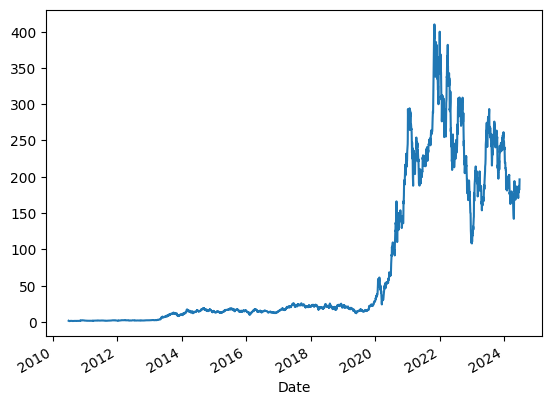

In [271]:
df['Close'].plot()
plt.show()

## 시점 기준으로 데이터 분할

In [272]:
close_before = df['Close'][:'2019']
close_after = df['Close']['2020':]

print(f'[period : ~2019]\n{close_before.describe}')
print('\n')
print(f'[period : 2020~]\n{close_after.describe}')

[period : ~2019]
<bound method NDFrame.describe of Date
2010-06-29 00:00:00-04:00     1.592667
2010-06-30 00:00:00-04:00     1.588667
2010-07-01 00:00:00-04:00     1.464000
2010-07-02 00:00:00-04:00     1.280000
2010-07-06 00:00:00-04:00     1.074000
                               ...    
2019-12-24 00:00:00-05:00    28.350000
2019-12-26 00:00:00-05:00    28.729334
2019-12-27 00:00:00-05:00    28.691999
2019-12-30 00:00:00-05:00    27.646667
2019-12-31 00:00:00-05:00    27.888666
Name: Close, Length: 2394, dtype: float64>


[period : 2020~]
<bound method NDFrame.describe of Date
2020-01-02 00:00:00-05:00     28.684000
2020-01-03 00:00:00-05:00     29.534000
2020-01-06 00:00:00-05:00     30.102667
2020-01-07 00:00:00-05:00     31.270666
2020-01-08 00:00:00-05:00     32.809334
                                ...    
2024-06-20 00:00:00-04:00    181.570007
2024-06-21 00:00:00-04:00    183.009995
2024-06-24 00:00:00-04:00    182.580002
2024-06-25 00:00:00-04:00    187.350006
2024-06-26 00:

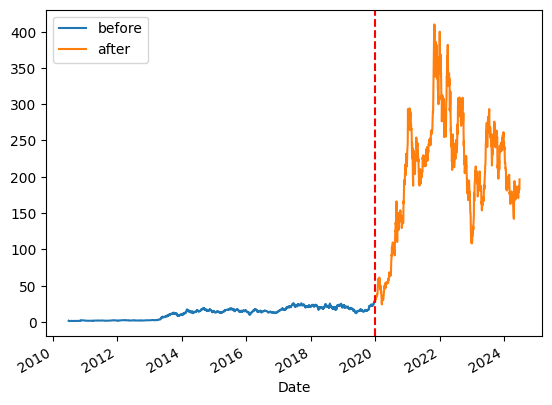

In [273]:
close_before.plot(label='before')
close_after.plot(label='after')
plt.legend() # 이름 부여

plt.axvline(x=close_after.index[0], c='r', linestyle='--')

plt.show()

## 데이터 길이 맞추기

In [274]:
l = len(close_after)
close_before = close_before.iloc[-l:]

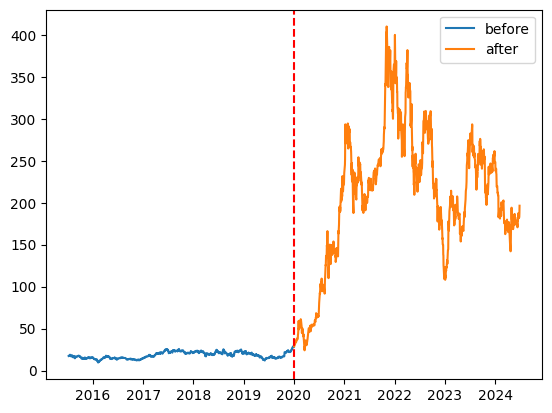

In [275]:
plt.plot(close_before, label='before')
plt.plot(close_after, label='after')
plt.legend() # 이름 부여

plt.axvline(x=close_after.index[0], c='r', linestyle='--')

plt.show()

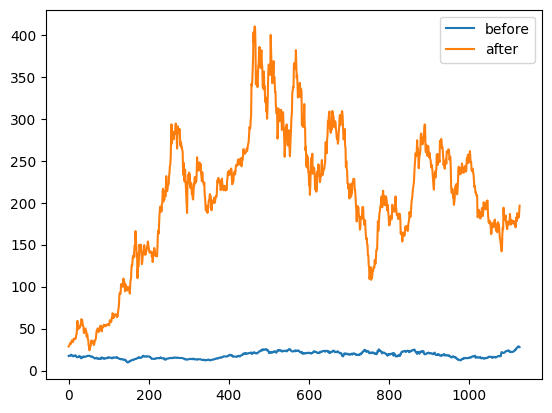

In [276]:
plt.plot(close_before.values, label='before')
plt.plot(close_after.values, label='after')

plt.legend()

plt.show()

## 데이터 스케일링

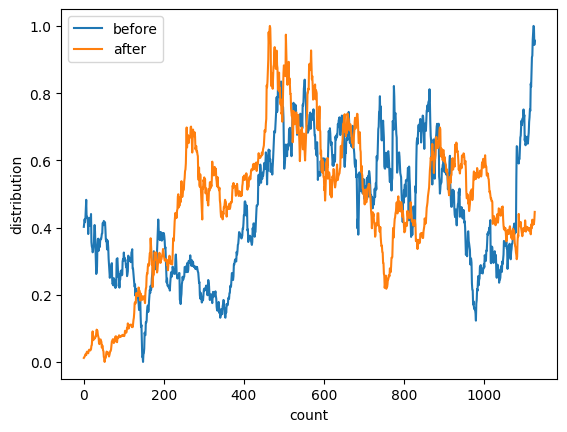

In [277]:
scaled_before = (close_before - close_before.min())
scaled_before /= (close_before.max() - close_before.min())

scaled_after = (close_after - close_after.min())
scaled_after /= (close_after.max() - close_after.min())

plt.plot(scaled_before.values, label='before')
plt.plot(scaled_after.values, label='after')

plt.legend()
plt.ylabel('distribution')
plt.xlabel('count')
plt.show()

# 회귀 분석

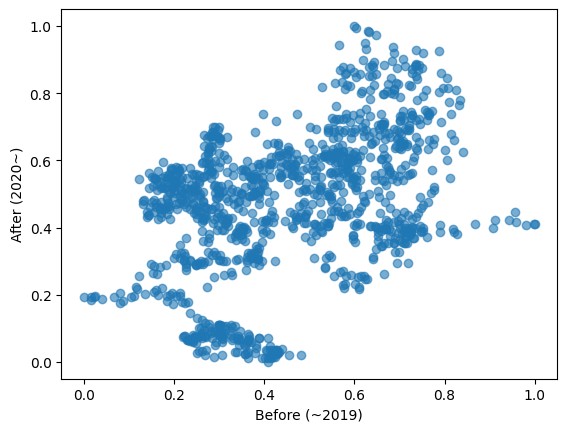

In [278]:
plt.scatter(x=scaled_before.values, y=scaled_after.values, alpha=0.6)

plt.xlabel('Before (~2019)')
plt.ylabel('After (2020~)')
plt.show()

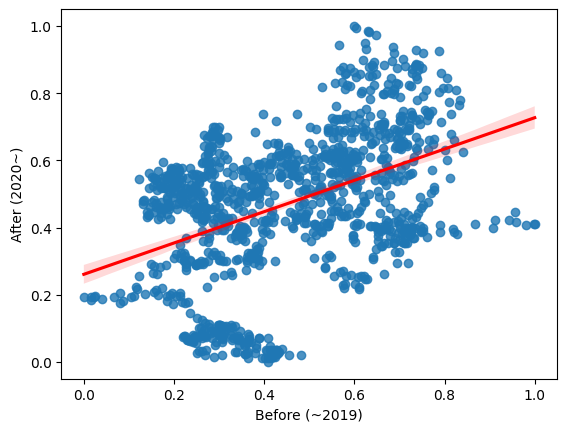

In [279]:
import seaborn as sns

sns.regplot(x=scaled_before.values, y=scaled_after.values, line_kws={"color":'red'})
plt.xlabel('Before (~2019)')
plt.ylabel('After (2020~)')
plt.show()

In [280]:
import statsmodels.api as sm
res = sm.OLS(endog=scaled_after.values, exog=sm.add_constant(scaled_before.values)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     257.2
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           2.70e-52
Time:                        13:57:25   Log-Likelihood:                 268.09
No. Observations:                1128   AIC:                            -532.2
Df Residuals:                    1126   BIC:                            -522.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2608      0.014     18.127      0.000       0.233       0.289
x1             0.4661      0.029     16.039      0.000       0.409       0.523
==============================================================================
Omnibus:                       58.540   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.587
Skew:                          -0.448   Prob(JB):                     1.04e-11
Kurtosis:                       2.476   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 정규성 검정

Text(0, 0.5, 'counts')

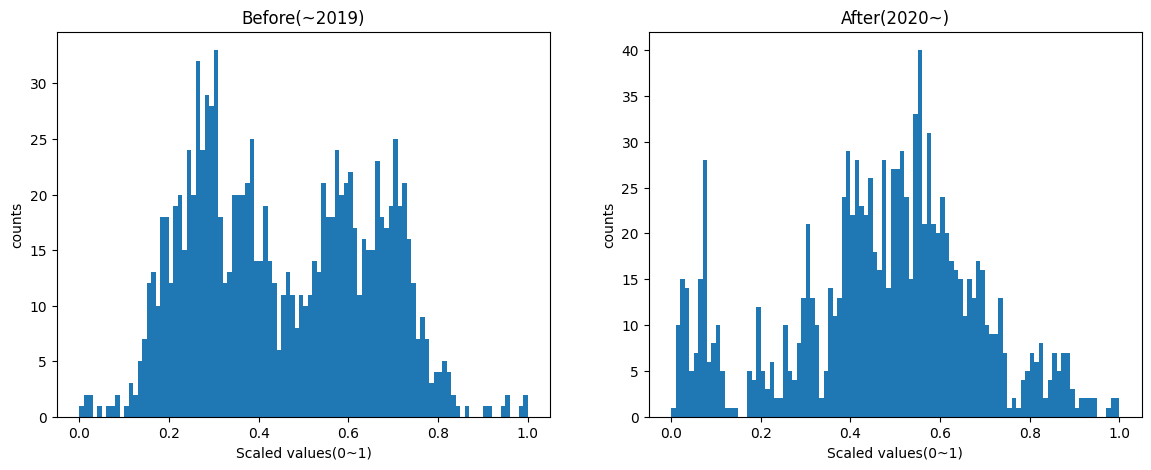

In [281]:
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.hist(scaled_before.values, bins=100)
plt.title('Before(~2019)')
plt.xlabel('Scaled values(0~1)')
plt.ylabel('counts')


plt.subplot(122)
plt.hist(scaled_after.values, bins=100)
plt.title('After(2020~)')
plt.xlabel('Scaled values(0~1)')
plt.ylabel('counts')


In [282]:
from scipy import stats

s, p= stats.kstest(scaled_before.values, 'norm')
print(f'[Before (~2019)] stats : {s: .2f} p-value: {p:.2f}')


s, p= stats.kstest(scaled_after.values, 'norm')
print(f'[After (2020~)] stats : {s: .2f} p-value: {p:.2f}')

[Before (~2019)] stats :  0.54 p-value: 0.00
[After (2020~)] stats :  0.50 p-value: 0.00


## 상관성 검정

In [283]:
c, p = stats.pearsonr(x=scaled_before.values, y=scaled_after.values)
print(f'stats: {c:.2f} p-value: {p:.2f}')

stats: 0.43 p-value: 0.00


## 쌍체 검정

In [286]:
t, p = stats.ttest_rel(a=scaled_before.values, b=scaled_after.values)
print(f'stats: {t:.2f} p-value: {p:.2f}')

stats: -2.78 p-value: 0.01
